# Importing Lib

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# Importing Fast.ai Lib

In [2]:
from fastai.conv_learner import *
from fastai.dataset import *

from pathlib import Path
import json
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects
#torch.cuda.set_device(3)

# Provading Path to data set 

In [3]:
PATH = Path('VOC2007/PASCAL_VOC')
list(PATH.iterdir())

[PosixPath('VOC2007/PASCAL_VOC/train.json')]

In [4]:
trn_j = json.load((PATH/'train.json').open())
trn_j.keys()

dict_keys(['images', 'type', 'annotations', 'categories'])

In [5]:
IMAGES,ANNOTATIONS,CATEGORIES = ['images', 'annotations', 'categories']
trn_j[IMAGES]

[{'file_name': '147.jpg', 'height': 600, 'width': 800, 'id': 147},
 {'file_name': '172.jpg', 'height': 768, 'width': 1024, 'id': 172},
 {'file_name': '204.jpg', 'height': 768, 'width': 1024, 'id': 204},
 {'file_name': '234.jpg', 'height': 768, 'width': 1024, 'id': 234},
 {'file_name': '196.jpg', 'height': 768, 'width': 1024, 'id': 196},
 {'file_name': '36.jpg', 'height': 600, 'width': 800, 'id': 36},
 {'file_name': '92.jpg', 'height': 768, 'width': 1024, 'id': 92},
 {'file_name': '177.jpg', 'height': 768, 'width': 1024, 'id': 177},
 {'file_name': '245.jpg', 'height': 600, 'width': 800, 'id': 245},
 {'file_name': '168.jpg', 'height': 768, 'width': 1024, 'id': 168},
 {'file_name': '113.jpg', 'height': 768, 'width': 1024, 'id': 113},
 {'file_name': '110.jpg', 'height': 768, 'width': 1024, 'id': 110},
 {'file_name': '165.jpg', 'height': 768, 'width': 1024, 'id': 165},
 {'file_name': '247.jpg', 'height': 600, 'width': 800, 'id': 247},
 {'file_name': '94.jpg', 'height': 768, 'width': 1024, '

In [6]:
trn_j[ANNOTATIONS][:2]

[{'area': 6319,
  'iscrowd': 0,
  'image_id': 147,
  'bbox': [356, 244, 71, 89],
  'category_id': 0,
  'id': 1,
  'ignore': 0,
  'segmentation': []},
 {'area': 3900,
  'iscrowd': 0,
  'image_id': 147,
  'bbox': [289, 249, 52, 75],
  'category_id': 0,
  'id': 2,
  'ignore': 0,
  'segmentation': []}]

In [7]:
trn_j[CATEGORIES][:4]

[{'supercategory': 'none', 'id': 0, 'name': 'Dent'},
 {'supercategory': 'none', 'id': 1, 'name': 'Dislocation'},
 {'supercategory': 'none', 'id': 2, 'name': 'Large_tear_or_damage'},
 {'supercategory': 'none', 'id': 3, 'name': 'Scratch_or_spot'}]

In [8]:
FILE_NAME,ID,IMG_ID,CAT_ID,BBOX = 'file_name','id','image_id','category_id','bbox'

cats = {o[ID]:o['name'] for o in trn_j[CATEGORIES]}
trn_fns = {o[ID]:o[FILE_NAME] for o in trn_j[IMAGES]}
trn_ids = [o[ID] for o in trn_j[IMAGES]]

In [9]:
PATH = Path('VOC2007')
list((PATH).iterdir())

[PosixPath('VOC2007/Annotations'),
 PosixPath('VOC2007/SegmentationObject'),
 PosixPath('VOC2007/JPEGImages'),
 PosixPath('VOC2007/SegmentationClass'),
 PosixPath('VOC2007/tmp'),
 PosixPath('VOC2007/models'),
 PosixPath('VOC2007/ImageSets'),
 PosixPath('VOC2007/PASCAL_VOC')]

In [10]:
PATH = Path('VOC2007/JPEGImages')
list(PATH.iterdir())

[PosixPath('VOC2007/JPEGImages/199.jpg'),
 PosixPath('VOC2007/JPEGImages/122.jpg'),
 PosixPath('VOC2007/JPEGImages/217.jpg'),
 PosixPath('VOC2007/JPEGImages/236.jpg'),
 PosixPath('VOC2007/JPEGImages/249.jpg'),
 PosixPath('VOC2007/JPEGImages/214.jpg'),
 PosixPath('VOC2007/JPEGImages/46.jpg'),
 PosixPath('VOC2007/JPEGImages/184.jpg'),
 PosixPath('VOC2007/JPEGImages/153.jpg'),
 PosixPath('VOC2007/JPEGImages/93.jpg'),
 PosixPath('VOC2007/JPEGImages/159.jpg'),
 PosixPath('VOC2007/JPEGImages/65.jpg'),
 PosixPath('VOC2007/JPEGImages/118.jpg'),
 PosixPath('VOC2007/JPEGImages/245.jpg'),
 PosixPath('VOC2007/JPEGImages/167.jpg'),
 PosixPath('VOC2007/JPEGImages/204.jpg'),
 PosixPath('VOC2007/JPEGImages/69.jpg'),
 PosixPath('VOC2007/JPEGImages/210.jpg'),
 PosixPath('VOC2007/JPEGImages/28.jpg'),
 PosixPath('VOC2007/JPEGImages/243.jpg'),
 PosixPath('VOC2007/JPEGImages/129.jpg'),
 PosixPath('VOC2007/JPEGImages/62.jpg'),
 PosixPath('VOC2007/JPEGImages/116.jpg'),
 PosixPath('VOC2007/JPEGImages/155.jpg')

In [11]:
im0_d = trn_j[IMAGES][0]
im0_d[FILE_NAME],im0_d[ID]

('147.jpg', 147)

In [12]:
def hw_bb(bb): return np.array([bb[1], bb[2], bb[3]+bb[0]-1, bb[2]+bb[0]-1])

trn_anno = collections.defaultdict(lambda:[])
for o in trn_j[ANNOTATIONS]:
    if not o['ignore']:
        bb = o[BBOX]
        bb = hw_bb(bb)
        trn_anno[o[IMG_ID]].append((bb,o[CAT_ID]))
        
len(trn_anno)

254

In [13]:
im_a = trn_anno[im0_d[ID]];im_a

[(array([244,  71, 444, 426]), 0), (array([249,  52, 363, 340]), 0)]

In [14]:
im0_a = im_a[0]; im0_a

(array([244,  71, 444, 426]), 0)

In [15]:
cats[2]

'Large_tear_or_damage'

In [16]:
trn_anno[2]

[(array([277,  68, 340, 371]), 3),
 (array([306,  63, 420, 437]), 3),
 (array([350,  57, 474, 499]), 3),
 (array([390,  46, 524, 533]), 3)]

In [17]:
cats[2],cats[3]

('Large_tear_or_damage', 'Scratch_or_spot')

In [18]:
bb_voc = [155, 96, 196, 174]
bb_fastai = hw_bb(bb_voc)

In [19]:
def bb_hw(a): return np.array([a[1],a[0],a[3]-a[1]+1,a[2]-a[0]+1])

In [20]:
f'expected: {bb_voc}, actual: {bb_hw(bb_fastai)}'

'expected: [155, 96, 196, 174], actual: [196  96 155 233]'

In [21]:
IMG_PATH = Path('VOC2007/JPEGImages')
im = open_image(IMG_PATH/im0_d[FILE_NAME])

In [22]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

In [23]:
def draw_outline(o, lw):
    o.set_path_effects([patheffects.Stroke(
        linewidth=lw, foreground='black'), patheffects.Normal()])

In [24]:
def draw_rect(ax, b):
    patch = ax.add_patch(patches.Rectangle(b[:2], *b[-2:], fill=False, edgecolor='white', lw=2))
    draw_outline(patch, 4)

In [25]:
def draw_text(ax, xy, txt, sz=14):
    text = ax.text(*xy, txt,
        verticalalignment='top', color='white', fontsize=sz, weight='bold')
    draw_outline(text, 1)

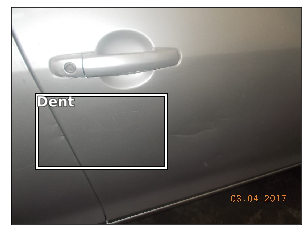

In [26]:
ax = show_img(im)
b = bb_hw(im0_a[0])
draw_rect(ax, b)
draw_text(ax, b[:2], cats[im0_a[1]])

In [27]:
def draw_im(im, ann):
    ax = show_img(im, figsize=(16,8))
    for b,c in ann:
        b = bb_hw(b)
        draw_rect(ax, b)
        draw_text(ax, b[:2], cats[c], sz=16)

In [28]:
def draw_idx(i):
    im_a = trn_anno[i]
    im = open_image(IMG_PATH/trn_fns[i])
    print(im.shape)
    draw_im(im, im_a)

(600, 800, 3)


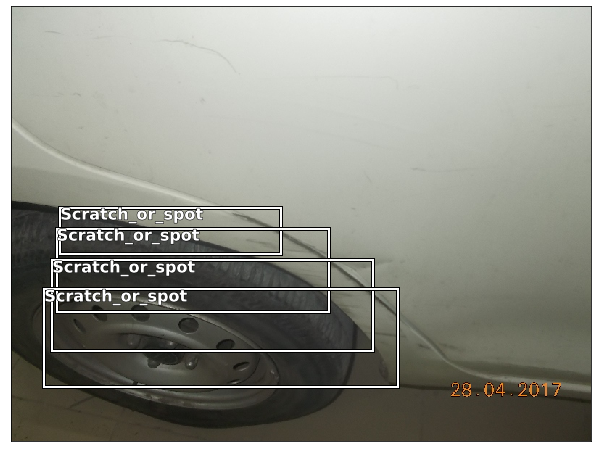

In [29]:
draw_idx(2)

In [30]:
def get_lrg(b):
    if not b: raise Exception()
    b = sorted(b, key=lambda x: np.product(x[0][-2:]-x[0][:2]), reverse=True)
    return b[0]

In [31]:
def get_lrg(b):
    if not b: raise Exception()
    b = sorted(b, key=lambda x: np.product(x[0][-2:]-x[0][:2]), reverse=True)
    return b[0]

In [32]:
trn_lrg_anno = {a: get_lrg(b) for a,b in trn_anno.items()}

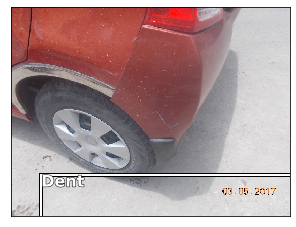

In [33]:
b,c = trn_lrg_anno[20]
b = bb_hw(b)
ax = show_img(open_image(IMG_PATH/trn_fns[10]), figsize=(5,10))
draw_rect(ax, b)
draw_text(ax, b[:2], cats[c], sz=16)

In [34]:
PATH = Path('VOC2007')

In [35]:
(PATH/'tmp').mkdir(exist_ok=True)
CSV = PATH/'tmp/lrg.csv'

In [36]:
cats

{0: 'Dent',
 1: 'Dislocation',
 2: 'Large_tear_or_damage',
 3: 'Scratch_or_spot',
 4: 'Shatter',
 5: 'Tear'}

In [37]:
df = pd.DataFrame({'fn': [trn_fns[o] for o in trn_ids],
    'cat': [cats[trn_lrg_anno[o][1]] for o in trn_ids]}, columns=['fn','cat'])
df.to_csv(CSV, index=False)

# Importing Resnet34 

In [38]:
f_model = resnet34
sz=224
bs=64

In [39]:
JPEGS = 'JPEGImages'


tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_side_on, crop_type=CropType.NO)
md = ImageClassifierData.from_csv(PATH, JPEGS, CSV, tfms=tfms, bs=bs)

In [40]:
x,y=next(iter(md.val_dl))

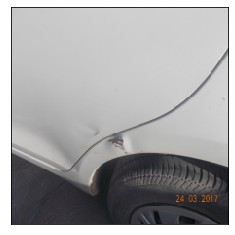

In [41]:
show_img(md.val_ds.denorm(to_np(x))[0]);

In [42]:
learn = ConvLearner.pretrained(f_model, md, metrics=[accuracy])
learn.opt_fn = optim.Adam

In [43]:
lr = 2e-2

In [44]:
learn.fit(lr, 1, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                
    0      3.262285   4.607092   0.6       



[4.607092380523682, 0.6000000238418579]

In [45]:
lrs = np.array([lr/1000,lr/100,lr])

In [46]:
learn.freeze_to(-2)

In [47]:
learn.unfreeze()

# Train the model 

In [48]:
learn.fit(lrs/5, 5, cycle_len=3)

epoch      trn_loss   val_loss   accuracy                   
    0      2.070395   1.624842   0.7       
    1      1.489549   1.067052   0.72                    
    2      1.125002   0.963811   0.76                    
    3      0.908026   1.228127   0.66                    
    4      0.768958   1.344965   0.56                    
    5      0.676072   1.335305   0.56                    
    6      0.591099   1.240894   0.52                    
    7      0.523882   1.246591   0.56                    
    8      0.46044    1.234708   0.56                    
    9      0.425244   1.224922   0.64                    
    10     0.379768   1.248      0.58                    
    11     0.348104   1.256238   0.6                     
    12     0.321551   1.273358   0.58                    
    13     0.31057    1.357306   0.56                    
    14     0.281294   1.304406   0.56                    



[1.3044062852859497, 0.5600000023841858]

# Saving Model 

In [49]:
learn.save('C_vision')

# Loading save Model 

In [50]:
learn.load('C_vision')

In [51]:
x,y = next(iter(md.val_dl))
probs = F.softmax(predict_batch(learn.model, x), -1)
x,preds = to_np(x),to_np(probs)
preds = np.argmax(preds, -1)

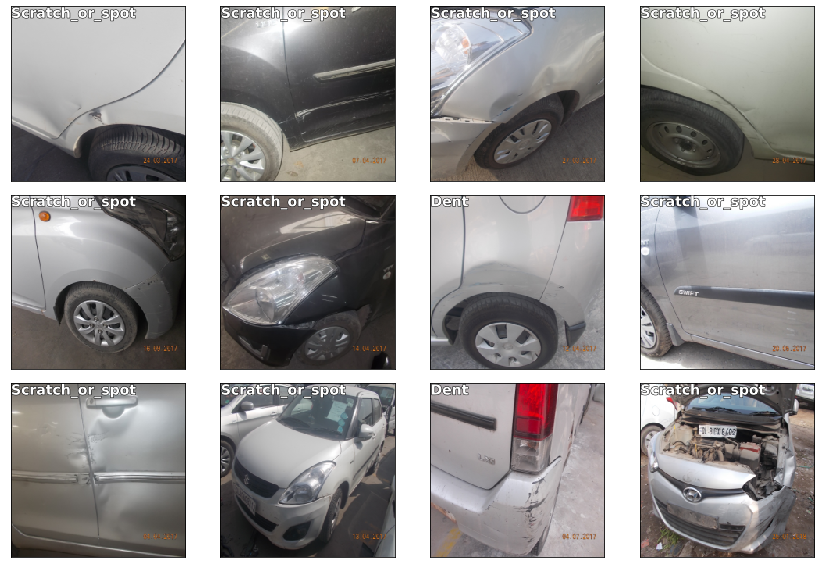

In [52]:
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
for i,ax in enumerate(axes.flat):
    ima=md.val_ds.denorm(x)[i]
    b = md.classes[preds[i]]
    ax = show_img(ima, ax=ax)
    draw_text(ax, (0,0), b)
plt.tight_layout()

In [53]:
BB_CSV = PATH/'tmp/bb.csv'

In [54]:
bb = np.array([trn_lrg_anno[o][0] for o in trn_ids])
bbs = [' '.join(str(p) for p in o) for o in bb]

df = pd.DataFrame({'fn': [trn_fns[o] for o in trn_ids], 'bbox': bbs}, columns=['fn','bbox'])
df.to_csv(BB_CSV, index=False)

In [55]:
BB_CSV.open().readlines()[:5]

['fn,bbox\n',
 '147.jpg,244 71 444 426\n',
 '172.jpg,325 94 114 129\n',
 '204.jpg,281 94 672 665\n',
 '234.jpg,260 201 626 677\n']

# Data Augmentation for increasing model acc

In [56]:
f_model=resnet34
sz=224
bs=64

In [57]:
augs = [RandomFlip(), 
        RandomRotate(30),
        RandomLighting(0.1,0.1)]

In [58]:
tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, aug_tfms=augs)
md = ImageClassifierData.from_csv(PATH, JPEGS, BB_CSV, tfms=tfms, continuous=True, bs=4)

[ 46. 390. 488. 135.]
[ 46. 390. 488. 135.]
[ 46. 390. 488. 135.]
[ 46. 390. 488. 135.]
[ 46. 390. 488. 135.]
[ 46. 390. 488. 135.]
[ 46. 390. 488. 135.]
[ 46. 390. 488. 135.]
[ 46. 390. 488. 135.]


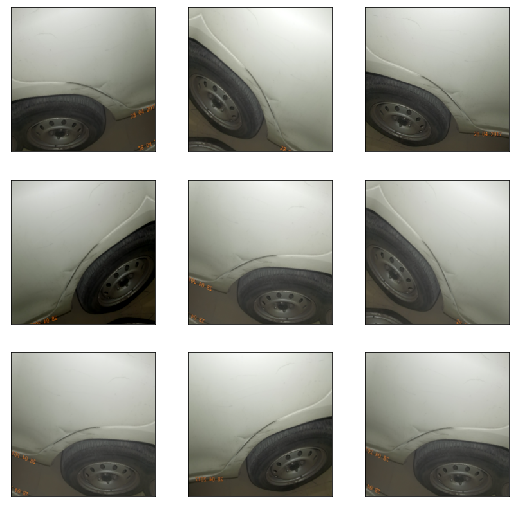

In [59]:
idx=3
fig,axes = plt.subplots(3,3, figsize=(9,9))
for i,ax in enumerate(axes.flat):
    x,y=next(iter(md.aug_dl))
    ima=md.val_ds.denorm(to_np(x))[idx]
    b = bb_hw(to_np(y[idx]))
    print(b)
    show_img(ima, ax=ax)
    draw_rect(ax, b)

In [60]:
augs = [RandomFlip(tfm_y=TfmType.COORD),
        RandomRotate(30, tfm_y=TfmType.COORD),
        RandomLighting(0.1,0.1, tfm_y=TfmType.COORD)]

In [61]:
tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, tfm_y=TfmType.COORD, aug_tfms=augs)
md = ImageClassifierData.from_csv(PATH, JPEGS, BB_CSV, tfms=tfms, continuous=True, bs=4)

[ 22. 136. 137.  81.]
[  0.  92. 135. 113.]
[ 18. 140. 137.  69.]
[ 28. 128. 139.  95.]
[ 10. 136. 136.  60.]
[ 52. 120. 136. 103.]
[ 85. 108. 138.  96.]
[ 37. 121. 134. 102.]
[ 55. 125. 138.  98.]


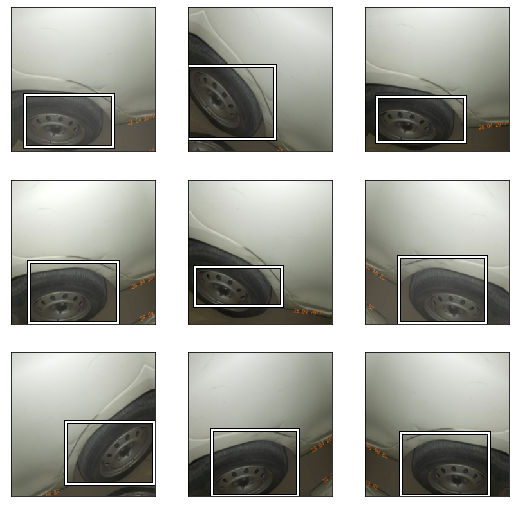

In [62]:
idx=3
fig,axes = plt.subplots(3,3, figsize=(9,9))
for i,ax in enumerate(axes.flat):
    x,y=next(iter(md.aug_dl))
    ima=md.val_ds.denorm(to_np(x))[idx]
    b = bb_hw(to_np(y[idx]))
    print(b)
    show_img(ima, ax=ax)
    draw_rect(ax, b)

In [63]:
tfm_y = TfmType.COORD
augs = [RandomFlip(tfm_y=tfm_y),
        RandomRotate(3, p=0.5, tfm_y=tfm_y),
        RandomLighting(0.05,0.05, tfm_y=tfm_y)]

tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, tfm_y=tfm_y, aug_tfms=augs)
md = ImageClassifierData.from_csv(PATH, JPEGS, BB_CSV, tfms=tfms, bs=bs, continuous=True)

In [64]:
512*7*7

25088

In [65]:
head_reg4 = nn.Sequential(Flatten(), nn.Linear(25088,4))
learn = ConvLearner.pretrained(f_model, md, custom_head=head_reg4)
learn.opt_fn = optim.Adam
learn.crit = nn.L1Loss()

In [66]:
learn.summary()

OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 224, 224]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('trainable', False),
                           ('nb_params', tensor(9408))])),
             ('BatchNorm2d-2',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('trainable', False),
                           ('nb_params', tensor(128))])),
             ('ReLU-3',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('nb_params', 0)])),
             ('MaxPool2d-4',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 56, 56]),
                           ('nb_params', 0)])),
             ('Conv2d-5',
              OrderedDict([('input_shape

In [67]:
lr = 2e-3

In [68]:
learn.fit(lr, 2, cycle_len=15, cycle_mult=2)

epoch      trn_loss   val_loss                           
    0      103.718179 64.200325 
    1      86.697695  90.013634                          
    2      82.096825  69.652443                          
    3      74.650203  52.249298                          
    4      69.618155  53.032822                          
    5      66.506215  54.368935                          
    6      62.91045   56.761127                          
    7      60.882067  57.667461                          
    8      59.360232  53.834976                          
    9      57.53144   51.997807                          
    10     56.011476  51.680561                          
    11     54.97526   52.100174                          
    12     53.865815  52.265884                          
    13     53.478361  52.313213                          
    14     52.691665  52.323822                          
    15     52.068903  55.316776                          
    16     51.589279  51.986073        

[53.16325378417969]

In [69]:
lrs = np.array([lr/100,lr/10,lr])

In [70]:
learn.freeze_to(-2)

In [71]:
learn.fit(lrs, 2, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss                           
    0      40.697794  65.374969 
    1      40.499672  58.866753                          
    2      40.283511  57.15564                           



[57.1556396484375]

In [72]:
learn.freeze_to(-3)

In [73]:
learn.fit(lrs, 1, cycle_len=2)

epoch      trn_loss   val_loss                           
    0      37.689972  62.913429 
    1      35.075757  55.050316                          



[55.050315856933594]

In [74]:
learn.save('C_vision1')

In [75]:
learn.load('C_vision1')

In [76]:
x,y = next(iter(md.val_dl))
learn.model.eval()
preds = to_np(learn.model(VV(x)))

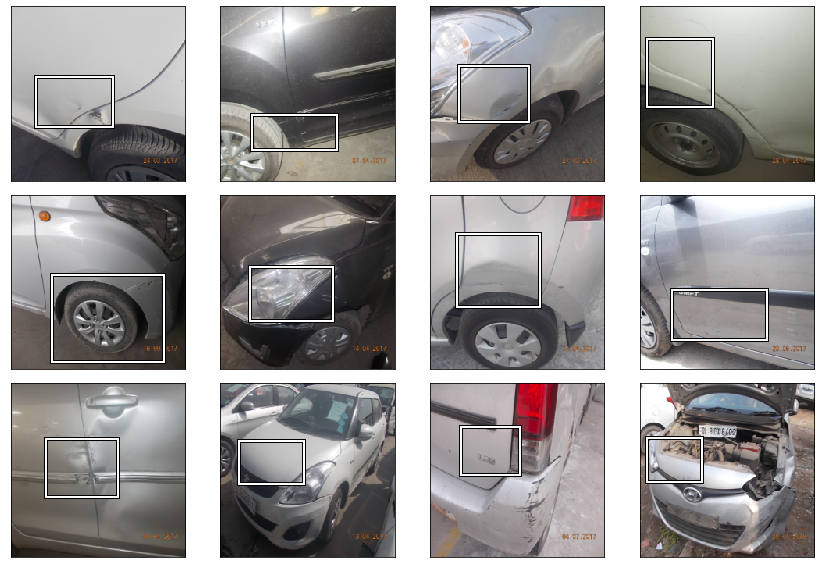

In [77]:
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
for i,ax in enumerate(axes.flat):
    ima=md.val_ds.denorm(to_np(x))[i]
    b = bb_hw(preds[i])
    ax = show_img(ima, ax=ax)
    draw_rect(ax, b)
plt.tight_layout()